<a href="https://colab.research.google.com/github/Vinayakmoudgil/MLOps/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [16]:
df=pd.read_csv('Position_Salaries.csv')
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values
y=y.reshape(len(y),1)
print(X,y.reshape(-1,1))

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] [[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scx= StandardScaler()
scy=StandardScaler()
X=scx.fit_transform(X)
y=scy.fit_transform(y)
print(X,y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [18]:
from sklearn.svm import SVR
reg=SVR(kernel='rbf')
reg.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [19]:
scy.inverse_transform(reg.predict(scx.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

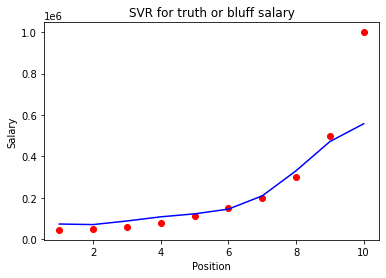

In [20]:
plt.scatter(scx.inverse_transform(X),scy.inverse_transform(y),color='red')
plt.plot(scx.inverse_transform(X),scy.inverse_transform(reg.predict(X).reshape(-1,1)),color='blue')
plt.title('SVR for truth or bluff salary')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

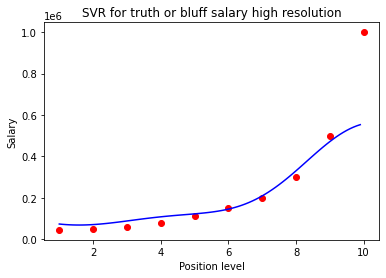

In [23]:
X_grid = np.arange(min(scx.inverse_transform(X)), max(scx.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(scx.inverse_transform(X), scy.inverse_transform(y), color = 'red')
plt.plot(X_grid, scy.inverse_transform(reg.predict(scx.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('SVR for truth or bluff salary high resolution')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()